In this Dojo we will - again - work with the MNIST data set. But this time, we will not use a plain-vanilla neural network, fed with flattend pixel values, like last week. Instead we will implement a CNN. We will also compare the result to what we got last week, which is why there is actually some starter code in this notebook. The dojo for this week will start where it says CNN_Dojo starts here. But we might want to come back to the code we wrote last week.  

Download or access the MNIST data set

Hint: There is a keras datasets module...

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers 


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Explore the data

How many data points do we have here?

What is the format of the data points

How many labels do we have?

What is the format of the labels?

What else would you like to know?



In [ ]:
print('X_train.shape', X_train.shape)
print('y_train.shape',y_train.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)

X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_test.shape (10000,)


In [ ]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

numpy.ndarray

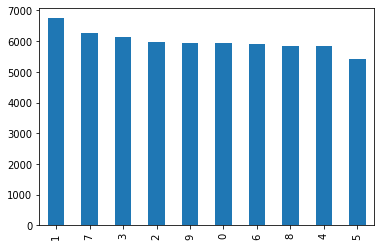

In [ ]:
import pandas as pd
type(y_train)
test = pd.Series(y_train)
test.value_counts().plot.bar()
type(test.values)

Visualize some images and display associated labels




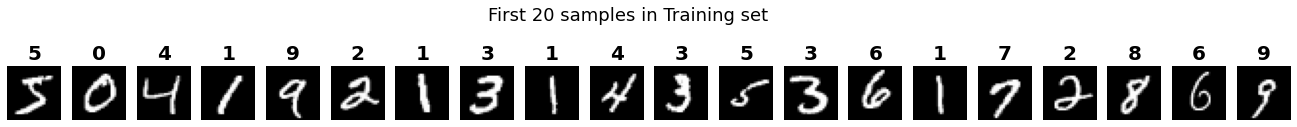

In [ ]:
import matplotlib.pyplot as plt

samples = 20

fig, axs = plt.subplots(1,samples, figsize=(23, 2.5))

for i in range (0, samples):
  axs.flat[i].imshow(X_train[i], cmap='gray')
  axs.flat[i].set_title(y_train[i], fontsize=20, fontweight="bold")
  axs.flat[i].axis('off')
plt.suptitle(f"First {samples} samples in Training set", fontsize=18)
plt.show()

Explore the data a little bit more: 

- Are all the images the same size?

- How are the labels distributed?


Convert the training and test images to a format which can be used in a plain-vanilla neural network


In [ ]:
X_train_flat = X_train.reshape(60000, 28*28)
X_test_flat = X_test.reshape(10000, 28*28)

In [ ]:
X_test_flat.shape

(10000, 784)

Now build a model to train on that dataset and display the architecture of the model.

In [ ]:
input_shape = X_test_flat.shape[1] # number of features
hidden_shape = input_shape
output_shape = np.unique(y_train).shape[0]
#output_shape = 1


model = tf.keras.models.Sequential() # model instance
model.add(tf.keras.layers.Dense(hidden_shape, input_shape=(input_shape,), activation='relu')) # 1. hidden layer with 784 inputs features
model.add(tf.keras.layers.Dense(output_shape, activation='softmax')) # output layer with 10 classes to clasify
model.summary() # architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# tf.nn.softmax(logits, axis=None, name=None)
# Die Funktion tf.nn.softmax konvertiert diese Protokolle für jede Klasse in "Wahrscheinlichkeiten":
#model(X_train[:1]).numpy()

Get ready for training and train the model

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'])

Make sure you are able to extract a learning curve of the training process. Print out that curve. 

In [ ]:
# Epoche 20
epo = 10
history = model.fit(X_train_flat, y_train, epochs=epo, validation_data=(X_test_flat, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.6604 - accuracy: 0.9125 - val_loss: 0.4991 - val_accuracy: 0.9322
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3738 - accuracy: 0.9394 - val_loss: 0.3977 - val_accuracy: 0.9356
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3417 - accuracy: 0.9416 - val_loss: 0.5536 - val_accuracy: 0.9262
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3166 - accuracy: 0.9449 - val_loss: 0.4063 - val_accuracy: 0.9421
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2530 - accuracy: 0.9517 - val_loss: 0.2939 - val_accuracy: 0.9479
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2338 - accuracy: 0.9541 - val_loss: 0.3142 - val_accuracy: 0.9460
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2325 - accuracy: 0.9564 - val_loss: 0.3788 - val_accuracy:

In [ ]:
print(model.predict(X_test_flat[:4])) # prediction für ersten x Zeilen
np.argmax(model.predict(X_test_flat[:4])) 

[[4.9503758e-32 2.7017597e-24 2.4434536e-17 2.4687732e-29 1.7109653e-19
  4.3699920e-24 0.0000000e+00 1.0000000e+00 4.5933898e-26 4.0295958e-21]
 [7.5984740e-28 7.3854970e-32 1.0000000e+00 2.1749978e-29 0.0000000e+00
  4.2197196e-17 2.2077639e-31 1.2151860e-29 1.7725964e-29 0.0000000e+00]
 [6.2264510e-25 1.0000000e+00 5.6974166e-23 1.0851739e-32 7.9018355e-18
  1.1913665e-25 2.2852724e-14 4.6107732e-17 6.2455852e-15 9.8466714e-20]
 [9.9784040e-01 1.0016233e-12 8.4036717e-04 8.0170457e-07 4.2453969e-09
  4.8157420e-07 6.0139719e-06 7.9324021e-12 8.9913863e-04 4.1263830e-04]]


7

In [ ]:
model.evaluate(X_test_flat,  y_test, verbose=2)

313/313 - 0s - loss: 0.3899 - accuracy: 0.9473


[0.3899216949939728, 0.9473000168800354]

Plot learning curve

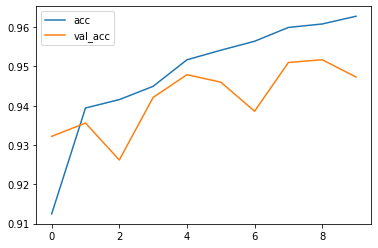

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

Now tune the hyperparameters. You should roughly get 95 Percent Accuracy on the test set. Can you get more? 


### Dojo for this week starts here!!!

Okay, there is still some clearing up to do, but we will leave that for now. 

First of all, we need to consider the format this model requires. Thankfully, we have given the flattened data a different name, so we could reuse our X_train and X_test from last week. 

Just print out the shape of our data again.




In [ ]:
display(X_train.shape)
display(X_test.shape)

(60000, 28, 28)

(10000, 28, 28)

In [ ]:
X_train_CNN = 
X_test_CNN = 

(60000, 28, 28, 1)

(10000, 28, 28, 1)

Now set up a model, called cnn_model (instead of model), that could classify our input images

In [ ]:
# cnn_model = ...
input_shape_cnn = 


(28, 28)

In [ ]:
output_shape_cnn = output_shape

In [ ]:
# build a model with 
#1. CNN Layer 1 with 16 units followed by MaxPooling
#2 Cnn Layer 2 with 32 units followed by MaxPooling
#CNN Layer 3 with 64 units followed by Flatten and 2 Dense layers
model_CNN = models.Sequential()



model_CNN.summary()

Compile the model


In [ ]:
# use Adam with lr 0.001

Train the model and make sure you can extract a learning curve after training

In [ ]:
epo_cnn = 10
history_CNN = 

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1669 - accuracy: 0.9578 - val_loss: 0.0548 - val_accuracy: 0.9821
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0541 - accuracy: 0.9835 - val_loss: 0.0552 - val_accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.0398 - val_accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0488 - val_accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9909 - val_loss: 0.0372 - val_accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.0384 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0253 - accuracy: 0.9926 - val_loss: 0.0459 - val_accuracy:

Note: val_accuracy is weighted accuracy - if weighted accuracy close to unweighted -> indication for good model (accuray in all classes)


Plot the learning curve

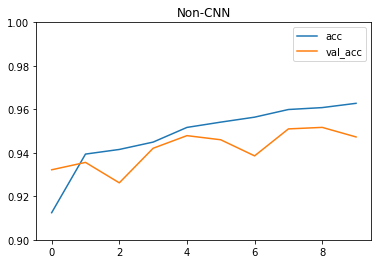

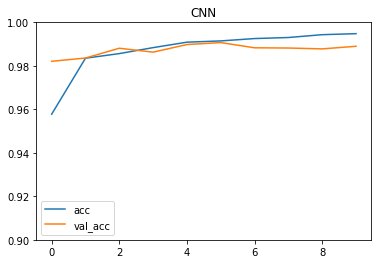

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.ylim((0.9, 1))
plt.title("Non-CNN")
plt.legend()
plt.show()

plt.plot(history_CNN.history['accuracy'], label='acc')
plt.plot(history_CNN.history['val_accuracy'], label='val_acc')
plt.ylim((0.9, 1))
plt.title("CNN")
plt.legend()
plt.show()

In [ ]:
# try another CNN with 1 Layer or/and Padding
model_CNN2 = models.Sequential()


In [ ]:
history_CNN2 = model_CNN2.fit(X_train_CNN, y_train, epochs=epo_cnn, validation_data=(X_test_CNN, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7035 - accuracy: 0.8300 - val_loss: 0.1417 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1118 - accuracy: 0.9674 - val_loss: 0.0837 - val_accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0764 - accuracy: 0.9771 - val_loss: 0.0840 - val_accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - accuracy: 0.9819 - val_loss: 0.0891 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0885 - val_accuracy: 0.9757
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9870 - val_loss: 0.1033 - val_accuracy: 0.9747
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.0875 - val_accuracy:

Compare the learning curve with the one from our first (plain-vanilla) neural network.

How can we improve the models?

Whatever you decide - it is always good to keep track of the experiments you carried out. And ideally this is not done with pen and paper. So let's set up a pandas dataframe for each of the models (nn and cnn) where we keep the results of our various experiments. We need columns for each hyperparameter and all the metrics we defined above. Possibly also for the history object. We also need a column with comments for each experiment. Make sure that the relevant columns can be filled after each experiment and also that the dataframe is saved after it has been updated.



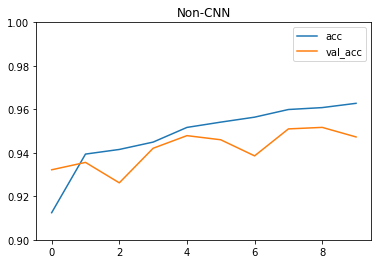

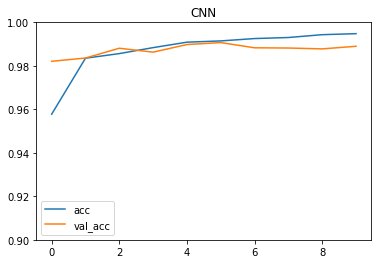

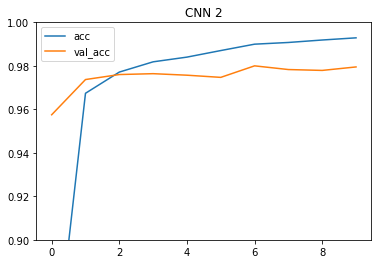

Evaluate the model on the test set. Its always good to keep track of various metrics. So let's write (or implement) a function or several functions that will give us the following: Overall weighted accuracy, overall unweighted accuracy, overall precision, overall recall and overall f1-score. And also accuracy, precision, recall and f1-score for each class. 

Note: weighted accuracy for model_CNN 98,85% -very similiar to unweighted 98,83%

Now let's try to systematically improve out models - and keep track of the results as we go along. 


After we have done a few experiments - let's look at the results: What improved the models most, which alteration least. Did you get a feeling for how important a hyperparameter is - and how they play together?